# Analyzing Weather Data

In [2]:
import pandas as pd
#import plotting packages
import matplotlib.pyplot as plt
#this line allows us to display graphs in this notebook
%matplotlib inline

### Data Loading and Basic Transformations

In [3]:
#load data from csv file
weather = pd.read_csv('weather-check.csv')

#rename columns to use shorter names
weather.columns = ['ID','checkDaily','howDoYouCheck','siteOrAppUsed','useSmartwatch','age','gender','income','region']

#since most columns have a fixed set of answers let's convert them to categorical data
categories = ['checkDaily', 'howDoYouCheck','useSmartwatch','age','gender','income','region']

for category in categories:
    weather[category] = weather[category].astype("category")

#replace dash in responses to No Answer    
cleanedData = weather.replace("-","No Answer")


### Data Visualization

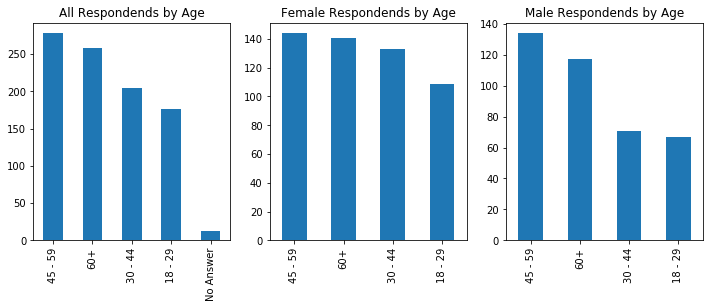

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

cleanedData['age'].value_counts().plot(kind='bar', title='All Respondends by Age', ax=axes[0])
cleanedData[cleanedData['gender']=='Female']['age'].value_counts().plot(kind='bar', title='Female Respondends by Age', ax=axes[1])
cleanedData[cleanedData['gender']=='Male']['age'].value_counts().plot(kind='bar', title='Male Respondends by Age', ax=axes[2])

This data shows that there are slightly fewer young men versus females (proportionally)in the sample

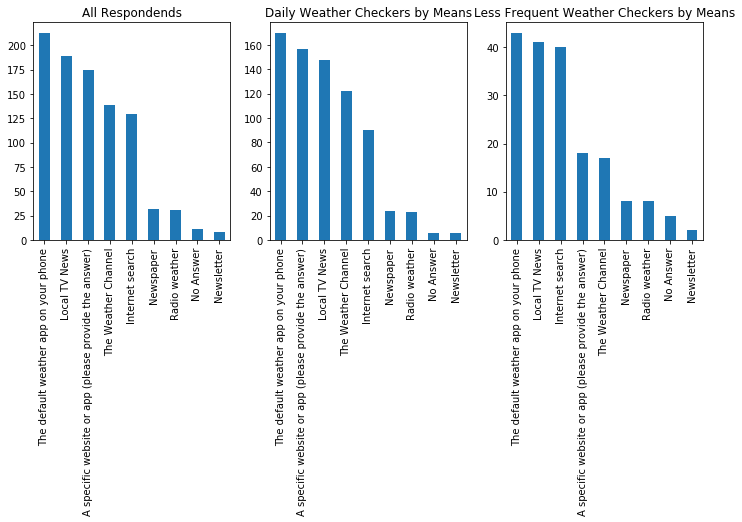

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
cleanedData['howDoYouCheck'].value_counts().plot(kind='bar', title='All Respondends', ax=axes[0])
cleanedData[cleanedData['checkDaily']=='Yes']['howDoYouCheck'].value_counts().plot(kind='bar', title='Daily Weather Checkers by Means', ax=axes[1])
cleanedData[cleanedData['checkDaily']=='No']['howDoYouCheck'].value_counts().plot(kind='bar', title='Less Frequent Weather Checkers by Means', ax=axes[2])

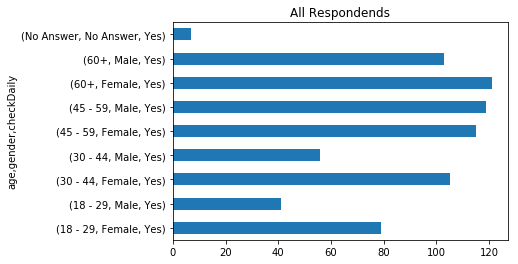

In [29]:
cleanedData[cleanedData['checkDaily']=='Yes'].groupby(['age', 'gender']).checkDaily.value_counts().plot(kind='barh', title='All Respondends')

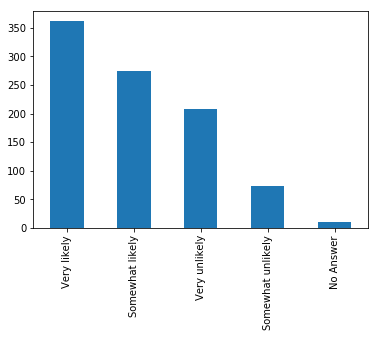

In [30]:
cleanedData['useSmartwatch'].value_counts().plot(kind='bar')

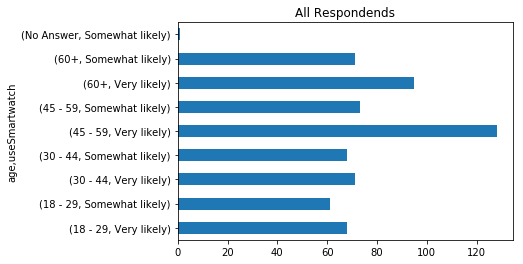

In [36]:
likely = cleanedData[cleanedData['useSmartwatch'].str.contains('Very likely|Somewhat likely')]
likely
likely.groupby(['age']).useSmartwatch.value_counts().plot(kind='barh', title='All Respondends')

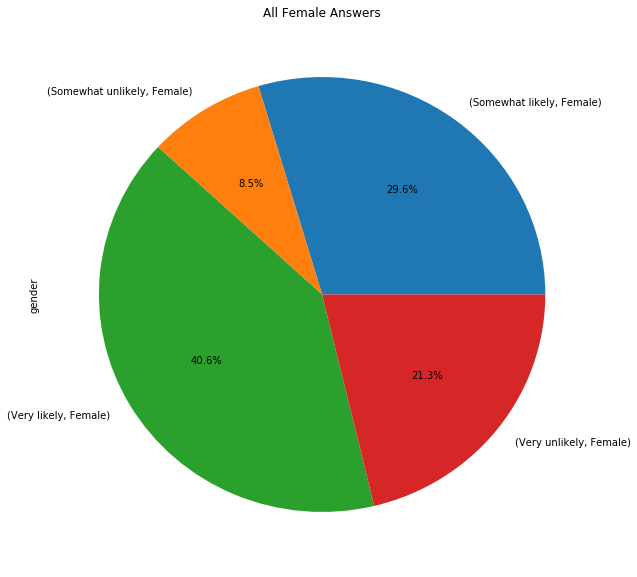

In [50]:
groupedByUseSmartwatch = cleanedData[cleanedData['gender']=='Female'].groupby(['useSmartwatch'])
groupedByUseSmartwatch.gender.value_counts().plot(kind='pie', autopct='%1.1f%%',title='All Female Answers', figsize=(10,10))

In [58]:
groupedByUseSmartwatch2 = cleanedData[cleanedData['gender']=='Male'].groupby(['useSmartwatch'])
groupedByUseSmartwatch2.gender.value_counts().plot(kind='pie', autopct='%1.1f%%',title='All Male Answers', figsize=10,10))

SyntaxError: invalid syntax (<ipython-input-58-0178f1da1031>, line 2)

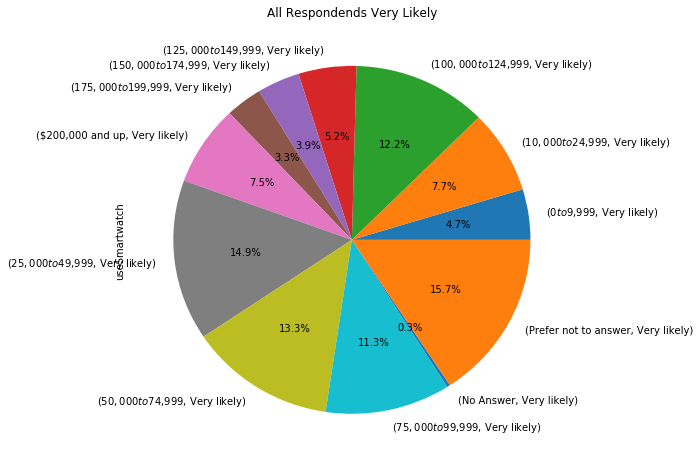

In [59]:
groupedByIncome = cleanedData[cleanedData['useSmartwatch']=='Very likely'].groupby(['income'])
groupedByIncome.useSmartwatch.value_counts().plot(kind='pie', autopct='%1.1f%%',title='All Respondends Very Likely', figsize=(8,8))

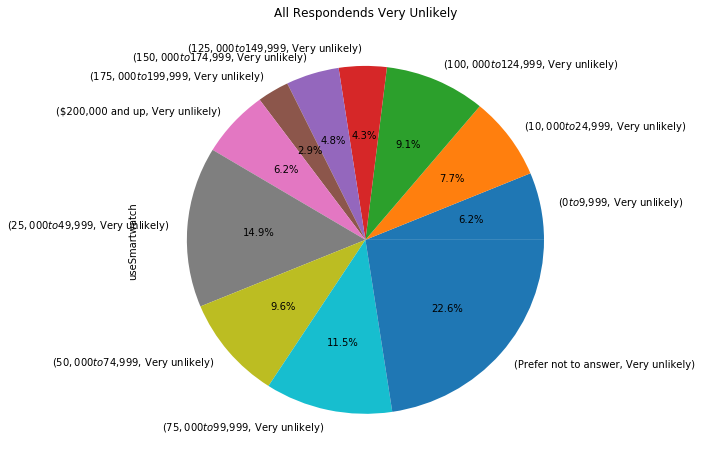

In [56]:
groupedByIncome2 = cleanedData[cleanedData['useSmartwatch']=='Very unlikely'].groupby(['income'])
groupedByIncome2.useSmartwatch.value_counts().plot(kind='pie', autopct='%1.1f%%',title='All Respondends Very Unlikely', figsize=(8,8))